# Customer Classification - EDA Notebook

**Who?**
>* 🏢 **Revenue Management (RM) teams** for hotel groups (corporate, franchise)
>
>
>* 🏨 On-site GMs, Sales, and Ops teams

**Why?**
>* 💰 **Revenue Management:** 
>  * Revenue optimization: Right price, right time, right customer
>    * Dynamic pricing
>    * Distribution channels
>    * Pricing per room type
>
>
>* 🤝 **Sales:**
>  * Group sales (pickup/wash)
>  * BT (performance/company for both GPP and LNR rates)
>
>
>* 🛌 **Rooms Ops:**
>  * Forecasting occupancy, arrivals, departures, stay-overs, same-day booking demand, and probability of guest relocation in the case of oversell.
>  * Determining staff schedules and periods of high demand
>
>
>* 🍰 ☕ **Food and Beverage:**
>  * Ordering food/supplies overall
>  * Scheduling staff
>  * Determining busy times (breakfast, lunch, dinner)
>    * Staffing, specific food/supplies

**What?**
>* 🧾 Dataset comprised of... 
>  * 32 different features
>    * Detailed explanation of features (and sub-categories, when appropriate) available in Readme
>  * Nearly 120,000 reservation records
>  * Source cited in Readme

❌ **How?**
>* Which models/methods? 
>* Data prep and feature engineering

---

> **Goal:** To prepare data for time series modeling and forecasting in next notebook.
>
>
> **Purpose:** to explore, clean, and organize.
>
>
> **Process:**
>
>    * Inspecting data integrity and statistics
>    * Splitting data by hotel type ("City" vs. "Resort")
>    * Filling any missing values
>    * 
>    * Save processed data for modeling notebook
>
>
> **Modeling Notebook:**
>
>    * Performing train/test split
>    * 
>    * Training the model
>    * 
>    * Evaluate performance metrics
>    * Provide final recommendations

---

# To-Do List

---

**Copy:**
- [ ] Imports
- [ ] Personal module
- [ ] Data
- [ ] Starter code from P4P

**Links:**
- [ ] 

---

# Import Packages

In [53]:
## Data Handling
import pandas as pd
import numpy as np
from scipy import stats

## Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modeling - SKLearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn import set_config
set_config(display='diagram')


## Custom-made Functions
from bmc_functions import eda
from bmc_functions import classification as clf

## Settings
plt.style.use('seaborn-talk')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('max_rows', 100)
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

# Read Data

In [3]:
## Reading data
source = './data/hotel_bookings.csv'
data = pd.read_csv(source)
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,nan,nan,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,nan,nan,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,nan,nan,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,nan,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,nan,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.00,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.00,nan,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.00,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.00,nan,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.00,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.00,nan,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.00,nan,0,Transient,104.40,0,0,Check-Out,2017-09-07


# EDA

In [4]:
## Inspecting percentage of city vs. resort hotels
data['hotel'].value_counts(1)

City Hotel     0.66
Resort Hotel   0.34
Name: hotel, dtype: float64

## Splitting "City" and "Resort" 

In [5]:
## Creating subgroup for city hotels
subgroup_city = data[data['hotel'] == 'City Hotel']
subgroup_city

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,0.00,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.00,nan,0,Transient,0.00,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,0.00,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.00,nan,0,Transient,76.50,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,0.00,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.00,nan,0,Transient,68.00,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,0.00,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.00,nan,0,Transient,76.50,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,0.00,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.00,nan,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.00,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.00,nan,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.00,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.00,nan,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.00,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.00,nan,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.00,nan,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
## Creating subgroup for resort hotels
subgroup_resort = data[data['hotel'] == 'Resort Hotel']
subgroup_resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,nan,nan,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,nan,nan,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,nan,nan,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,nan,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,nan,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,1.00,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,143.00,nan,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,0.00,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250.00,nan,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,0.00,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250.00,nan,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,0.00,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40.00,nan,0,Contract,112.80,0,1,Check-Out,2017-09-14


## Reviewing Statistics

In [7]:
eda.report_df(subgroup_city).sort_values('null_sum', ascending=False)

,null_sum,null_pct,datatypes,num_unique,count,mean,std,min,25%,50%,75%,max
company,75641,0.95,float64,207,"3,689.00",145.27,119.77,8.00,40.00,91.00,219.00,497.00
agent,8131,0.10,float64,223,"71,199.00",28.14,56.43,1.00,9.00,9.00,17.00,509.00
country,24,0.00,object,166,nan,nan,nan,nan,nan,nan,nan,nan
children,4,0.00,float64,4,"79,326.00",0.09,0.37,0.00,0.00,0.00,0.00,3.00
adr,0,0.00,float64,5405,"79,330.00",105.30,43.60,0.00,79.20,99.90,126.00,"5,400.00"
lead_time,0,0.00,int64,453,"79,330.00",109.74,110.95,0.00,23.00,74.00,163.00,629.00
market_segment,0,0.00,object,8,nan,nan,nan,nan,nan,nan,nan,nan
meal,0,0.00,object,4,nan,nan,nan,nan,nan,nan,nan,nan
previous_bookings_not_canceled,0,0.00,int64,73,"79,330.00",0.13,1.69,0.00,0.00,0.00,0.00,72.00
previous_cancellations,0,0.00,int64,10,"79,330.00",0.08,0.42,0.00,0.00,0.00,0.00,21.00


In [8]:
# Dropping "company" column (95% missing values) , "hotel" column (only 1 value)
subgroup_city.drop(columns = ['company', 'hotel'], inplace=True)
subgroup_city

C:\Users\bmcca\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,0,6,2015,July,27,1,0,2,1,0.00,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.00,0,Transient,0.00,0,0,Check-Out,2015-07-03
40061,1,88,2015,July,27,1,0,4,2,0.00,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.00,0,Transient,76.50,0,1,Canceled,2015-07-01
40062,1,65,2015,July,27,1,0,4,1,0.00,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.00,0,Transient,68.00,0,1,Canceled,2015-04-30
40063,1,92,2015,July,27,1,2,4,2,0.00,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.00,0,Transient,76.50,0,2,Canceled,2015-06-23
40064,1,100,2015,July,27,2,0,2,2,0.00,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.00,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.00,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.00,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,0,102,2017,August,35,31,2,5,3,0.00,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.00,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,0,34,2017,August,35,31,2,5,2,0.00,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.00,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,0,109,2017,August,35,31,2,5,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.00,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [9]:
subgroup_city.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## EDA - Features

## reservation_status

In [20]:
subgroup_city['reservation_status'].value_counts(1, dropna=False)

Check-Out   0.58
Canceled    0.41
No-Show     0.01
Name: reservation_status, dtype: float64

### Binarizing

In [30]:
## Changing no-show values to "canceled"
subgroup_city['reservation_status'].replace('No-Show', 'Canceled',
                                            inplace=True)

C:\Users\bmcca\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
## Confirming the change
'No-Show' in subgroup_city['reservation_status']

False

In [32]:
## Inspecting the updated target classes
subgroup_city['reservation_status'].value_counts(1, dropna=False)

Check-Out   0.58
Canceled    0.42
Name: reservation_status, dtype: float64

## is_canceled

In [10]:
subgroup_city['is_canceled'].value_counts(1, dropna=False)

0   0.58
1   0.42
Name: is_canceled, dtype: float64

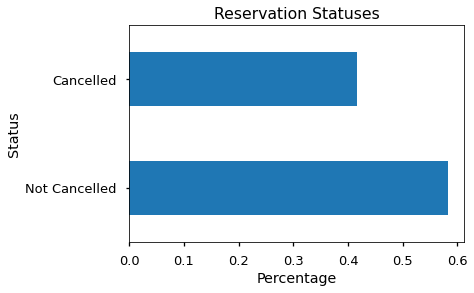

In [17]:
## Visualizing results
fig, ax = plt.subplots()
subgroup_city['is_canceled'].value_counts(1, dropna=False).plot(kind='barh',
                                                                ax=ax)
ax.set_yticklabels(['Not Cancelled', 'Cancelled'])
ax.set_xlabel('Percentage')
ax.set_ylabel('Status')
ax.set_title('Reservation Statuses');

## lead_time

In [18]:
subgroup_city['lead_time'].describe()

count   79,330.00
mean       109.74
std        110.95
min          0.00
25%         23.00
50%         74.00
75%        163.00
max        629.00
Name: lead_time, dtype: float64

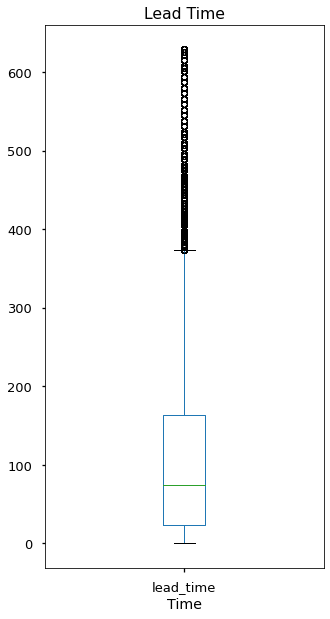

In [40]:
fig, ax = plt.subplots(figsize=(5,10))
subgroup_city['lead_time'].plot(kind='box', ax=ax)

ax.set_title('Lead Time');

In [56]:
fig = px.box(subgroup_city, y="lead_time", title='Overview of Lead Time',
             labels = {'lead_time': 'Lead Time (Days)'}, width=600, color='reservation_status')
fig.show()

## Arrival as Datetime

In [57]:
## Converting from month, day of month, and year to a single datetime column
subgroup_city['arrival_date'] = subgroup_city['arrival_date_month'] +' '+ \
                                subgroup_city['arrival_date_day_of_month']\
                                .astype(str) +', '+ \
                                subgroup_city['arrival_date_year'].astype(str)
subgroup_city['arrival_date'] = pd.to_datetime(subgroup_city['arrival_date'])
subgroup_city['arrival_date']

C:\Users\bmcca\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\bmcca\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



40060    2015-07-01
40061    2015-07-01
40062    2015-07-01
40063    2015-07-01
40064    2015-07-02
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 79330, dtype: datetime64[ns]

## stays_in_weekend_nights

In [ ]:
subgroup_city['stays_in_weekend_nights'].describe()

## stays_in_week_nights

In [ ]:
subgroup_city['stays_in_week_nights'].describe()

## Adults

In [ ]:
subgroup_city['adults'].value_counts(1, dropna=False)

## Children

In [ ]:
subgroup_city['children'].value_counts(1, dropna=False)

## babies

In [ ]:
subgroup_city['babies'].value_counts(1, dropna=False)

In [ ]:
subgroup_city['babies'].describe()

## meal

In [ ]:
subgroup_city['meal'].value_counts(1, dropna=False)

## country

In [ ]:
subgroup_city['country'].value_counts(1, dropna=False)

## market_segment

In [ ]:
subgroup_city['market_segment'].value_counts(1, dropna=False)

## distribution_channel

In [ ]:
subgroup_city['distribution_channel'].value_counts(1, dropna=False)

## is_repeated_guest

In [ ]:
subgroup_city['is_repeated_guest'].value_counts(1, dropna=False)

## previous_cancellations

In [ ]:
subgroup_city['previous_cancellations'].describe()

## previous_bookings_not_canceled

In [ ]:
subgroup_city['previous_bookings_not_canceled'].describe()

##  reserved_room_type

In [ ]:
subgroup_city['reserved_room_type'].value_counts(1, dropna=False)

## assigned_room_type

In [ ]:
subgroup_city['assigned_room_type'].value_counts(1, dropna=False)

## booking_changes

In [ ]:
subgroup_city['booking_changes'].describe()

## deposit_type

In [ ]:
subgroup_city['deposit_type'].value_counts(1, dropna=False)

## agent

In [ ]:
subgroup_city['agent'].value_counts(1, dropna=False)

## days_in_waiting_list

In [ ]:
subgroup_city['days_in_waiting_list'].describe()

## customer_type

In [ ]:
subgroup_city['customer_type'].value_counts(1, dropna=False)

## adr

In [ ]:
subgroup_city['adr'].describe()

## required_car_parking_spaces

In [ ]:
subgroup_city['required_car_parking_spaces'].value_counts(1, dropna=False)

## total_of_special_requests

In [ ]:
subgroup_city['total_of_special_requests'].value_counts(1, dropna=False)

## reservation_status_date

In [ ]:
subgroup_city['reservation_status_date']